In [1]:
import numpy as np
import torch
import matplotlib as mpl
import matplotlib.pyplot as plt
from PIL import Image

In [2]:
def process_image(image):
    ''' Scales, crops, and normalizes a PIL image for a PyTorch model,
        returns an Numpy array
    '''
    # TODO: Process a PIL image for use in a PyTorch model
    
    # Resize the image where the shortest side is 256 pixels
    if image.size[0] < image.size[1]:
        image = image.resize((256, int(image.size[1]/image.size[0] * 256)))
    else:
        image = image.resize((int(image.size[0]/image.size[1] * 256, 256)))
    
    # Crop image to size 224*224
    crop_size = 224
    left = int((image.size[0]-crop_size)/2) if image.size[0]>crop_size else 0
    upper = int((image.size[1]-crop_size)/2) if image.size[1]>crop_size else 0
    right = left+crop_size if image.size[0]>crop_size else image.size[0]
    lower = upper+crop_size if image.size[1]>crop_size else image.size[1]
    crop_box = (left, upper, right, lower)
    image = image.crop(crop_box)

    # Normalize the image
    image = np.array(image)
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    image = (image/255 - mean) / std
    
    # Convert the array to torch tensor
    image = torch.tensor(image.transpose((2, 0, 1)))
    return image

In [3]:
def imshow(image, ax=None, title=None):
    """Imshow for Tensor."""
    if ax is None:
        fig, ax = plt.subplots()
    
    # PyTorch tensors assume the color channel is the first dimension
    # but matplotlib assumes is the third dimension
    image = image.numpy().transpose((1, 2, 0))
    
    # Undo preprocessing
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    image = std * image + mean
    
    # Image needs to be clipped between 0 and 1 or it looks like noise when displayed
    image = np.clip(image, 0, 1)
    
    ax.imshow(image)
    
    return ax

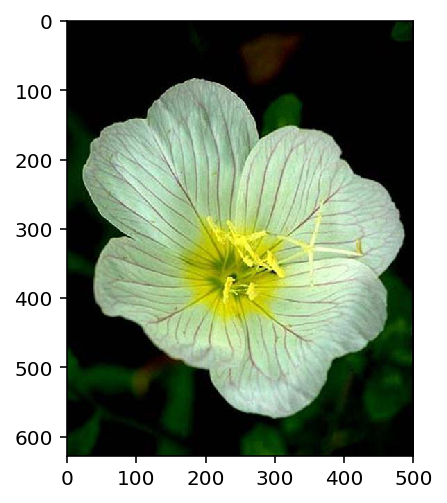

In [4]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

image = Image.open('flower_data/valid/1/image_06739.jpg').convert('RGB')
fig, ax = plt.subplots()
ax.imshow(image)

original image size:  (500, 628)
resized image:  (256, 321) <class 'PIL.Image.Image'>
verify resize:  0.512 0.5111464968152867


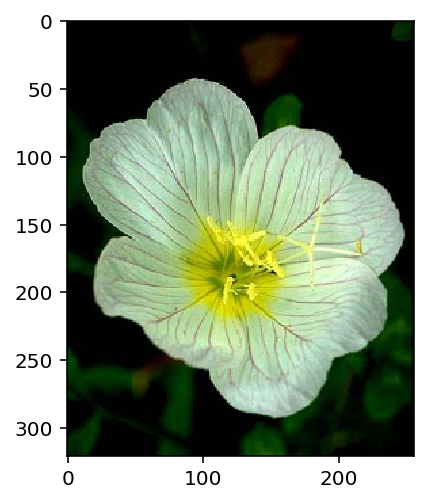

In [5]:
print('original image size: ', image.size)

if image.size[0] < image.size[1]:
    image = image.resize((256, int(image.size[1]/image.size[0] * 256)))
else:
    image = image.resize((int(image.size[0]/image.size[1] * 256, 256)))

fig, ax = plt.subplots()
ax.imshow(image)

print('resized image: ', image.size, type(image))
print('verify resize: ', 256/500, 321/628)

(224, 224)


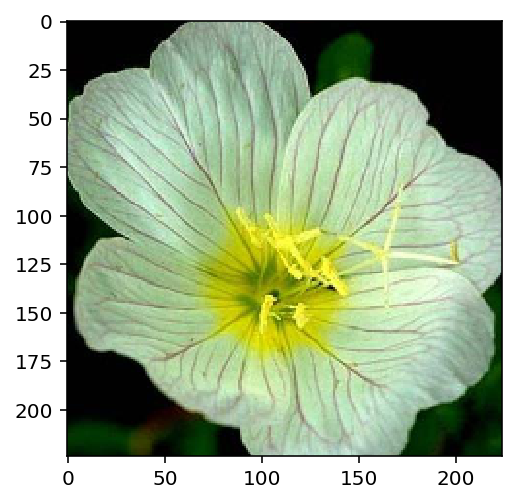

In [6]:
crop_size = 224

left = int((image.size[0]-crop_size)/2) if image.size[0]>crop_size else 0
upper = int((image.size[1]-crop_size)/2) if image.size[1]>crop_size else 0
right = left+crop_size if image.size[0]>crop_size else image.size[0]
lower = upper+crop_size if image.size[1]>crop_size else image.size[1]

crop_box = (left, upper, right, lower)
image = image.crop(crop_box)
image.save('tmp/tmp.jpg')

print(image.size)
fig, ax = plt.subplots()
ax.imshow(image)

image shape:  (224, 224, 3)


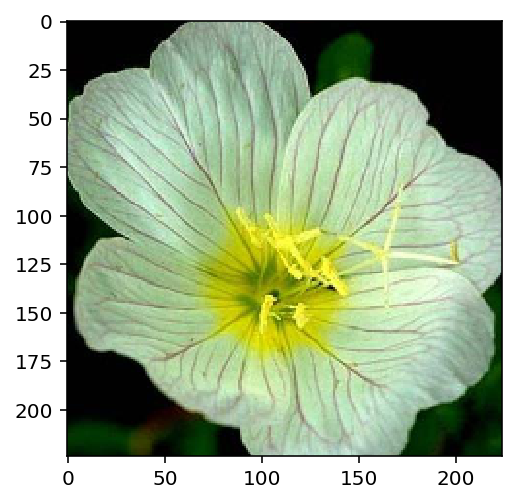

In [7]:
np_image = np.array(image)

print('image shape: ', np_image.shape)
fig, ax = plt.subplots()
ax.imshow(np_image)

image shape:  (224, 224, 3)


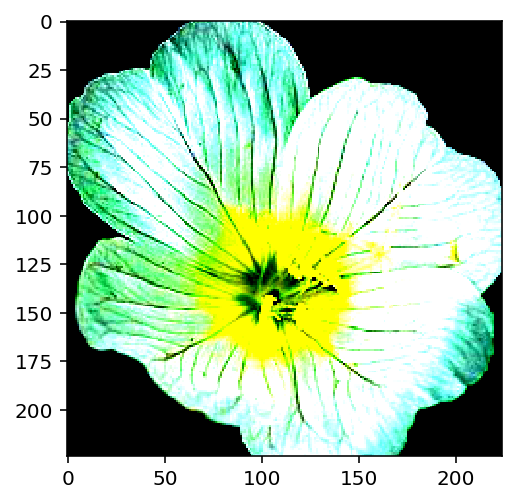

In [8]:
mean = np.array([0.485, 0.456, 0.406])
std = np.array([0.229, 0.224, 0.225])
np_image = (np_image/255 - mean) / std

print('image shape: ', np_image.shape)
fig, ax = plt.subplots()
ax.imshow(np.clip(np_image, 0, 1))

image to tensor:  <class 'torch.Tensor'> torch.Size([3, 224, 224])


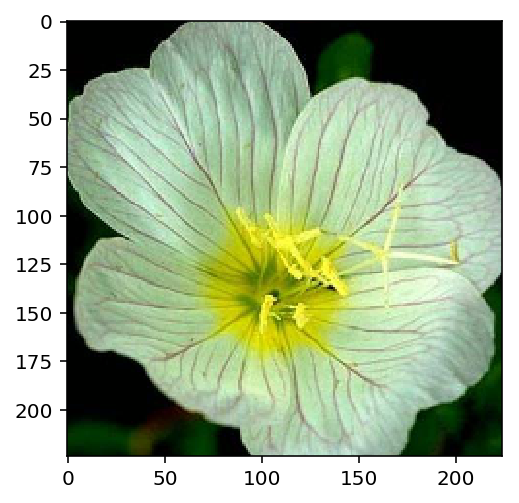

In [9]:
tensor_image = torch.tensor(np_image.transpose((2, 0, 1)))
print('image to tensor: ', type(tensor_image), tensor_image.shape)

imshow(tensor_image)

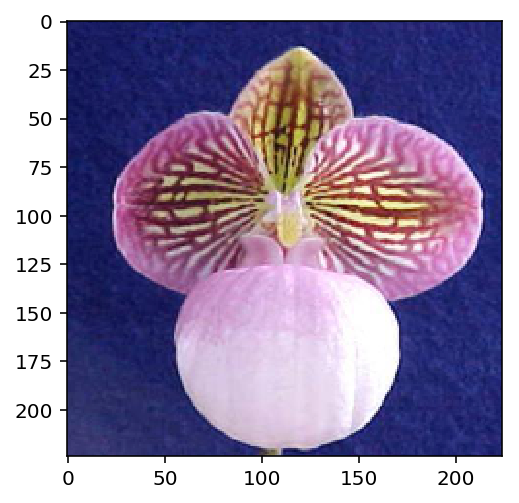

In [10]:
image = Image.open('flower_data/valid/2/image_05094.jpg')
image = process_image(image)
imshow(image)